<a href="https://colab.research.google.com/github/hasan2249/DeepLearning/blob/main/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

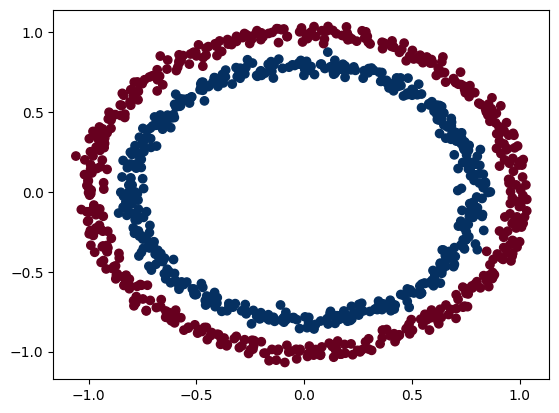

In [1]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [2]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [5]:
from torch import nn
model_3 = nn.Sequential(
    nn.Linear(in_features=2,out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10,out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10,out_features=1),
)

In [6]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [7]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [8]:
# Fit the model
torch.manual_seed(42)
epochs = 2000

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69170, Accuracy: 50.00% | Test Loss: 0.69086, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.68675, Accuracy: 52.88% | Test Loss: 0.68685, Test Accuracy: 53.50%
Epoch: 200 | Loss: 0.68202, Accuracy: 53.37% | Test Loss: 0.68302, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.67599, Accuracy: 53.87% | Test Loss: 0.67802, Test Accuracy: 53.50%
Epoch: 400 | Loss: 0.66754, Accuracy: 56.62% | Test Loss: 0.67079, Test Accuracy: 54.50%
Epoch: 500 | Loss: 0.65428, Accuracy: 64.00% | Test Loss: 0.65969, Test Accuracy: 63.00%
Epoch: 600 | Loss: 0.63231, Accuracy: 72.25% | Test Loss: 0.64126, Test Accuracy: 69.00%
Epoch: 700 | Loss: 0.59369, Accuracy: 82.88% | Test Loss: 0.60860, Test Accuracy: 79.00%
Epoch: 800 | Loss: 0.52551, Accuracy: 95.12% | Test Loss: 0.55146, Test Accuracy: 90.50%
Epoch: 900 | Loss: 0.39494, Accuracy: 99.38% | Test Loss: 0.42377, Test Accuracy: 96.50%
Epoch: 1000 | Loss: 0.26661, Accuracy: 99.75% | Test Loss: 0.29949, Test Accuracy: 99.00%
Epoch: 1100 | Loss: 0.

In [9]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

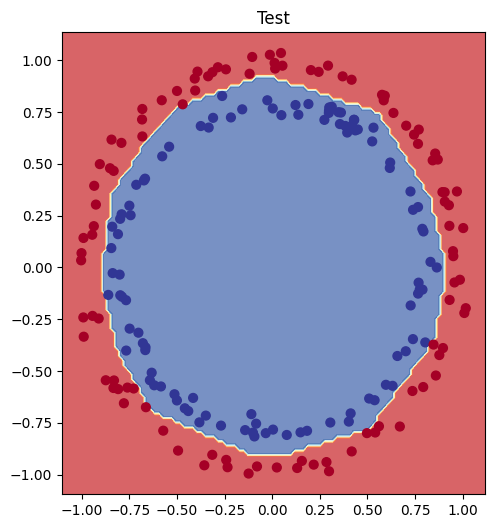

In [10]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

# New Section

In [11]:
t = torch.tensor([-1 , -5 , 5 , 0, 9])
r = torch.sigmoid(t)
r

tensor([0.2689, 0.0067, 0.9933, 0.5000, 0.9999])

In [24]:
def acc_fn(logits , res):
  cor = torch.eq(logits,res).sum().item()
  return cor
  # ac = (cor / len(res)) * 100
  # return ac

In [25]:
s= torch.tensor([1,1,0,0,1])
t = torch.tensor([1,1,1,0,1])
acc_fn(s,t)

4

In [5]:
import numpy as np
import torch

q = np.linspace(-15,15,60)
t = torch.from_numpy(q)

def tanh(x):
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

s= tanh(t)

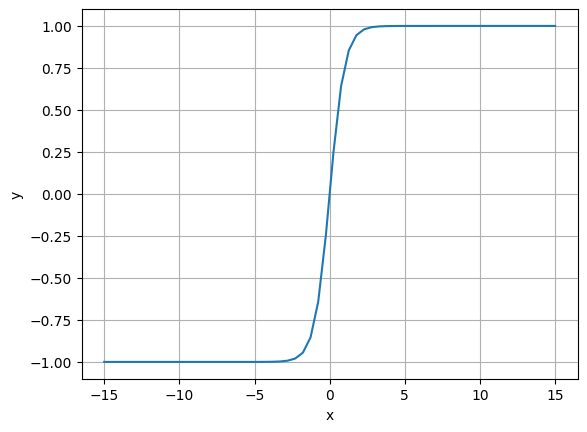

In [12]:
import matplotlib.pyplot as plt

plt.grid(True)
# plt.tilte('Tanh')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(q,s)
plt.show()